In [1]:
import numpy as np
import matplotlib.pyplot as plt

The goal of this notebook is to create a finite difference method solver for the n-dimensional diffusion equation

$$
\frac{\partial}{\partial t} N(\vec{r}, t) = D \nabla^2 N(\vec{r}, t)
$$
.

This PDE will be solved on an n-dimensional rectangular prism $Q \subset \mathbb{R}^n$ over a time frame $[0, t_f]$. It will be solved with initial condition $N(\vec{r}, 0) = f(\vec{r}) \, \forall \vec{r} \in Q$ for some function f, and with Dirichlet boundary conditions $N(\vec{r}, t) = 0 \, \forall \vec{r} \in \partial Q \, \forall t \in [0, t_f]$.

To begin, we consider the 1-dimensional case of the diffusion equation 

$$
\frac{\partial}{\partial t} N(x, t) = D  \frac{\partial^2}{\partial x^2} N(x, t)
$$
.

This PDE will be solved on the interval $x \in [a, b]$ over a time frame $t \in [0, t_f]$. It will be solved with initial condition $N(x, 0) = f(x) \, \forall x \in [a, b]$ for some function f, and with Dirichlet boundary conditions $N(a, t) = N(b, t) = 0 \, \forall t \in [0, t_f]$.

In implementing a finite difference method solver for the equation $\frac{\partial}{\partial t} N(x, t) = D  \frac{\partial^2}{\partial x^2} N(x, t)$, we discretize time and space into steps of $\Delta t$ and $\Delta x$, respectively. Then using appropirate approximations for partial derivatives, we find

$$
\frac{N_i^{n+1} - N_i^{n}}{\Delta t} = \frac{D}{\Delta x^2} (N_{i+1}^n - 2 N_{i}^n + N_{i-1}^n)
$$

where upper indices represent time and lower indices represent spatial position. We can rearrange to find

$$
N_i^{n+1} = \frac{D \Delta t}{\Delta x^2} (N_{i+1}^n - 2 N_{i}^n + N_{i-1}^n) + N_i^n
$$

, which allows us to find N at the next time step from information about the current time.

Note: in solving the 1-dimensional diffusion equation, we must use a spatial resolution $\Delta x << \lambda$, where $\lambda$ is the characteristic wavelength of the initial condition function $f$. We must also use a time step $\Delta t << \frac{\Delta x^2}{D}$ in order to get accurate results. (These conditions were derived in Lecture 11.)

In [149]:
def solve_diffusion_eqn_1D(tspan, n_tsteps, xspan, n_xsteps, D, f, BC='dirichlet'):
    """
    Gives a numerical solution to the one-dimensional diffusion equation.
    Should have dx << lambda and dt << (dx)^2 / D for accurate results, where lambda is the characteristic
        wavelength of the initial condition function.
    tspan: [start_time, stop_time]
    n_tsteps: number of time steps to use
    xspan: [left_boundary, right_boundary]
    n_xsteps: number of spatial steps to use
    D: diffusion constant
    f: function f giving the initial condition N(x, 0) = f(x)
    BC: indicates boundary conditions to use. If 'dirichlet', uses fixed boundary conditions
        N(0, t) = N(right_boundary, t) = 0 (for all t)
    return: A 2-dimensional array with t on the 0th axis and x on 1st axis that holds solved values for N_i^n. 
    Also returns ts and xs, 1-dimensional arrays which list the times and positions used for the grid.
    """
    
    tspan = np.asarray(tspan, dtype=np.double)
    xspan = np.asarray(xspan, dtype=np.double)
    ts = np.linspace(tspan[0], tspan[1], n_tsteps+1, dtype=np.double)
    xs = np.linspace(xspan[0], xspan[1], n_xsteps+1, dtype=np.double)
    dt = (tspan[1] - tspan[0]) / n_tsteps
    dx = (xspan[1] - xspan[0]) / n_xsteps
    
    
    N = np.zeros((n_tsteps+1, n_xsteps+1), dtype=np.double) # first index = time, second index = position
    
    # Set initial conditions
    N[0, :] = f(xs)
    
    # Solve
    if BC=='dirichlet':
        # Note: Dirichlet BCs are hard-coded in by essentially setting N[n, -1] = N[n, n_xsteps+1] = 0
        for n in range(n_tsteps):
            for i in range(n_xsteps+1):
                if i==0: # left boundary
                    N[n+1, i] = D*dt/(dx**2) * (N[n, i+1] - 2*N[n, i] + 0        )  +  N[n, i]
                elif i==n_xsteps: # right boundary
                    N[n+1, i] = D*dt/(dx**2) * (0         - 2*N[n, i] + N[n, i-1])  +  N[n, i]
                else: # not at a boundary
                    N[n+1, i] = D*dt/(dx**2) * (N[n, i+1] - 2*N[n, i] + N[n, i-1])  +  N[n, i]
            #debug
            if n % 1000 == 0: print(n)
            
    else:
        print('These boundary conditions have not been implemented yet')
        return
                
    return N, ts, xs

In [147]:
def gaussian(x):
    # To be used as an initial condition
    a = 1
    sigma = 1
    mu = 5
    return a * np.exp(-(x-mu)**2 / (2*sigma**2))

In [152]:
N, ts, xs = solve_diffusion_eqn_1D([0, 10], 10000, [0, 10], 300, 0.1, gaussian, BC='dirichlet')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


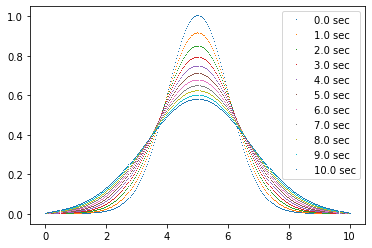

In [153]:
for time in np.linspace(0, 10, 11):
    n = int(time / (10/10000))
    plt.plot(xs, N[n, :], marker=',', ls='none', label=str(time)+' sec')
    plt.legend()

In [159]:
def squarebump(x):
    halfwidth = 1
    center = 5
    if np.abs(x-5) <= halfwidth: return 1
    else: return 0
squarebump = np.vectorize(squarebump)

In [160]:
N, ts, xs = solve_diffusion_eqn_1D([0, 10], 10000, [0, 10], 300, 0.1, squarebump, BC='dirichlet')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


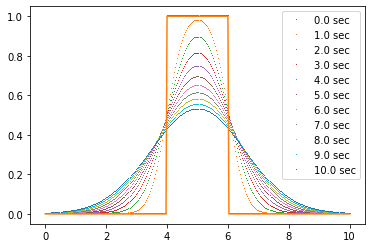

In [164]:
for time in np.linspace(0, 10, 11):
    n = int(time / (10/10000))
    plt.plot(xs, N[n, :], marker=',', ls='none', label=str(time)+' sec')
    plt.legend()

plt.plot(xs, N[0, :])